In [1]:
import numpy as np

In [2]:
from blg_strain.bands import get_bands

In [3]:
kx, ky, Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=20, Nky=20, Delta=0.02, delta=0.02)

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

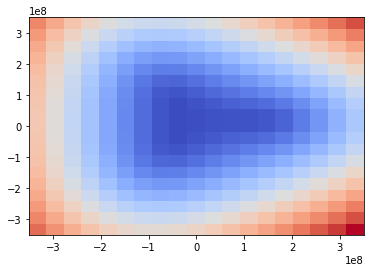

In [5]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, E[2], cmap='coolwarm')

In [6]:
from blg_strain.microscopic import feq_func, meff_func

In [7]:
feq_func(np.array([0,1]), 0.5, 0)

array([1., 0.])

In [8]:
meff = meff_func(kx, ky, E)
meff.shape

(4, 20, 20, 2, 2)

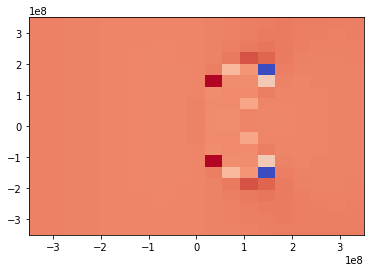

In [9]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, meff[2, :, :, 0, 0], cmap='coolwarm')

In [10]:
from blg_strain.macroscopic import n_func

In [16]:
n_func(kx, ky, E, Psi, .03, T=0, layer=1), n_func(kx, ky, E, Psi, .03, T=0, layer=2)

(7151423155697416.0, 7151423155697416.0)